# word Embedding

#### Word2Vec est un algorithme largement utilisé basé sur les réseaux de neurones, En utilisant de grandes quantités de texte brut non annoté, word2vec apprend automatiquement les relations entre les mots. Les résultats sont des vecteurs, un vecteur par mot, avec des relations linéaires remarquables qui nous permettent de faire des choses comme:

##### vec («roi») - vec («homme») + vec («femme») = ~ vec («reine»)

In [9]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.test.utils import lee_corpus_list
from gensim.test.utils import datapath
from gensim import utils
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import multiprocess
import multiprocessing

In [2]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
    ['this', 'is', 'the', 'second', 'sentence'],
    ['yet', 'another', 'sentence'],
    ['one', 'more', 'sentence'],
    ['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.key_to_index)
print(words)
# access vector for one word
print(model.wv['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, vector_size=100, alpha=0.025)
['sentence', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first']
[-5.3622725e-04  2.3643016e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588715e-03  8.9729885e-03
 -5.0154282e-03 -3.7633730e-03  7.3805046e-03 -1.5334726e-03
 -4.5366143e-03  6.5540504e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488189e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508893e-03 -3.4053659e-03 -9.4640255e-04  5.7685734e-03
 -7.5216386e-03 -3.9361049e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337698e-03 -1.9377422e-03
  8.0774352e-03 -5.9308959e-03  4.5161247e-05 -4.7537349e-03
 -9.6035507e-03  5.0072931e-03 -8.7595871e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618264e-04 -7.6612402e-03  9.6147414e-03
  4.9820566e-03  9.2331432e-03 -8.1579182e-03  4.4957972e-03
 -4.1370774e-03  8.2453492e-04  8.498

In [3]:
model.wv['and'].shape, model.wv['and'][:10]

((100,),
 array([-0.00872748,  0.00213016, -0.00087354, -0.00931909, -0.00942814,
        -0.00141072,  0.00443241,  0.00370407, -0.00649869, -0.00687307],
       dtype=float32))

In [4]:
try:
    model.wv['rrrrrrrr']
except KeyError as e:
    print(e)

"Key 'rrrrrrrr' not present"


In [5]:
X = model.wv[model.wv.key_to_index]

In [6]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

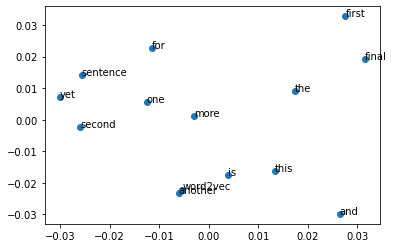

In [7]:
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

#### test: créer notre propre embedding

In [8]:
# Openning all the treated data files

path = 'C:/Users/BCS/Documents/M2/Stage/'

file_name = 'tokens_stem'

file_extension = '.txt'

df = pd.read_csv(path + file_name + file_extension, sep="\t", encoding='utf-8')
df_json = df.reset_index(drop=True)


NameError: name 'pd' is not defined

In [ ]:
# créa modèle
cores = multiprocessing.cpu_count()

In [ ]:
model_size = 100

In [ ]:
model = gensim.models.Word2Vec(df_json, size = model_size, window = 5, min_count = 2, 
                               workers = cores-1, sg = 0, max_final_vocab = 5000, iter=10)